<a href="https://colab.research.google.com/github/rindanh/Latihan-NDSC/blob/main/airbnb/Latihan_H_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns
import time
from tqdm.notebook import tqdm
from sklearn.model_selection import StratifiedKFold

### **Bagi data train test (kalo belum ada pembagian)**

In [2]:
url = 'https://raw.githubusercontent.com/rindanh/Latihan-NDSC/main/airbnb/'
df = pd.read_csv(url + "AB_US_2020.csv")

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (4) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['price'])
Y = df.price

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.5, random_state=42)

In [4]:
df_train = pd.concat([X_train, Y_train], axis=1)
df_test = pd.concat([X_test, Y_test], axis=1)

### **Siapin data train test (kalo udah ada pembagian)**

In [ ]:
df_train = pd.read_csv("/content/drive/My Drive/LOMBA/NDSC/...")
df_test = pd.read_csv("/content/drive/My Drive/LOMBA/NDSC/...")
sample = pd.read_csv("/content/drive/My Drive/LOMBA/NDSC/...")

In [ ]:
X_train = df_train[:]
Y_train = df_train['']

X_test = df_test[:]
Y_test = df_test['']

### **Analisis Awal**

In [5]:
X_train.head().T

,183806,22199,114665,179735,57719
id,10922065,35027501,32067722,36174824,22707293
name,Large Double Queen Bedroom in Charming Beach Home,Cozy Spacious Modern Studio,Luxury Modern Condo in AWESOME location!!!!,"Bed,Bath, Study,TV-picturesque views & wildlif...",‚ù§Ô∏è RENOVATED! AMAZING OCEAN VIEW! ‚ù§Ô∏è
host_id,3816836,48974322,112910785,270882987,15101308
host_name,Tom,Pamela,Marigny,Nitu,Jill
neighbourhood_group,NaN,NaN,NaN,NaN,Maui
neighbourhood,Pacific Beach,Pembroke Pines,Central Business District,San Jose,Lahaina
latitude,32.8097,26.0157,29.9514,37.3596,20.9504
longitude,-117.248,-80.2539,-90.0711,-121.801,-156.689
room_type,Private room,Entire home/apt,Entire home/apt,Private room,Entire home/apt
minimum_nights,3,2,2,1,3


In [6]:
X_test.head().T

,182851,46603,18675,90901,25085
id,6123863,33341740,21784725,30562982,41833198
name,"Stylish Remodeled House with Deck, Steps to Di...","Lux420, Rftop deck, Hot tub, Elvtr in ‚ù§Ô∏è o...",LARGE POOL HOUSE IN HOLLYWOOD NEW POOL DECK,"Modern 2 BR House in Hollywood, Keyless Entry!",New Renovated House - Hard Rock / Hollywood Beach
host_id,9072515,111000374,158736535,134940933,120149672
host_name,Jessica,Elma,Euseb,Jonathan,Yaseen
neighbourhood_group,NaN,NaN,NaN,City of Los Angeles,NaN
neighbourhood,West University Heights,Five Points,Hollywood,Hollywood Hills,Hollywood
latitude,32.7599,39.7544,26.016,34.1191,26.0159
longitude,-117.143,-104.985,-80.2309,-118.32,-80.2301
room_type,Entire home/apt,Entire home/apt,Entire home/apt,Entire home/apt,Entire home/apt
minimum_nights,2,30,2,30,2


In [7]:
X_train.describe().T

,count,mean,std,min,25%,50%,75%,max
id,113015.0,2.547587e+07,1.316295e+07,109.00000,1.520671e+07,2.583618e+07,3.774686e+07,4.551439e+07
host_id,113015.0,9.374970e+07,9.815399e+07,23.00000,1.423898e+07,5.153162e+07,1.506332e+08,3.679176e+08
latitude,113015.0,3.563081e+01,6.869376e+00,18.92099,3.275422e+01,3.714373e+01,4.072340e+01,4.773462e+01
longitude,113015.0,-1.032532e+02,2.625080e+01,-159.71490,-1.186000e+02,-9.781701e+01,-7.692509e+01,-7.099595e+01
minimum_nights,113015.0,1.018321e+01,2.570696e+01,1.00000,1.000000e+00,2.000000e+00,7.000000e+00,1.250000e+03
number_of_reviews,113015.0,3.447616e+01,6.349722e+01,0.00000,1.000000e+00,8.000000e+00,3.900000e+01,9.530000e+02
reviews_per_month,88602.0,1.438040e+00,1.696134e+00,0.01000,2.300000e-01,8.200000e-01,2.070000e+00,4.406000e+01
calculated_host_listings_count,113015.0,1.662728e+01,5.114299e+01,1.00000,1.000000e+00,2.000000e+00,6.000000e+00,5.930000e+02
availability_365,113015.0,1.596366e+02,1.403102e+02,0.00000,0.000000e+00,1.410000e+02,3.120000e+02,3.650000e+02


In [8]:
X_test.describe().T

,count,mean,std,min,25%,50%,75%,max
id,113015.0,2.546764e+07,1.319338e+07,344.00000,1.510990e+07,2.597801e+07,3.771301e+07,4.556085e+07
host_id,113015.0,9.329800e+07,9.839422e+07,23.00000,1.373679e+07,5.108071e+07,1.491236e+08,3.679071e+08
latitude,113015.0,3.569484e+01,6.830159e+00,18.98232,3.276887e+01,3.729647e+01,4.072478e+01,4.773395e+01
longitude,113015.0,-1.031881e+02,2.619343e+01,-159.71428,-1.185946e+02,-9.781725e+01,-7.418282e+01,-7.100200e+01
minimum_nights,113015.0,8.949147e+02,2.974623e+05,1.00000,1.000000e+00,2.000000e+00,7.000000e+00,1.000000e+08
number_of_reviews,113015.0,3.453690e+01,6.370870e+01,0.00000,1.000000e+00,8.000000e+00,3.900000e+01,9.660000e+02
reviews_per_month,88826.0,1.424877e+00,1.670202e+00,0.01000,2.300000e-01,8.000000e-01,2.060000e+00,3.243000e+01
calculated_host_listings_count,113015.0,1.676984e+01,5.099496e+01,1.00000,1.000000e+00,2.000000e+00,6.000000e+00,5.930000e+02
availability_365,113015.0,1.589931e+02,1.400488e+02,0.00000,0.000000e+00,1.390000e+02,3.110000e+02,3.650000e+02


In [9]:
def dataset_summary(df) :

    # Buat summary dataframe
    summary_df = pd.DataFrame()

    # Isi summary
    summary_df['Var'] = df.columns
    summary_df['Dtypes'] = df.dtypes.values
    summary_df['Total Missing'] = df.isnull().sum().values
    summary_df['Missing%'] = summary_df['Total Missing'] / len(df) * 100
    summary_df['Total Unique'] = df.nunique().values
    summary_df['Unique%'] = summary_df['Total Unique'] / len(df) * 100

    # Ukuran dataset
    print('Dataset dimension :',df.shape)

    return summary_df

In [10]:
dataset_summary(X_train)

Dataset dimension : (113015, 16)


,Var,Dtypes,Total Missing,Missing%,Total Unique,Unique%
0,id,int64,0,0.000000,113014,99.999115
1,name,object,15,0.013273,110279,97.579082
2,host_id,int64,0,0.000000,74333,65.772685
3,host_name,object,16,0.014157,20245,17.913551
4,neighbourhood_group,object,57683,51.040127,34,0.030085
5,neighbourhood,object,0,0.000000,1424,1.260010
6,latitude,float64,0,0.000000,86447,76.491616
7,longitude,float64,0,0.000000,85346,75.517409
8,room_type,object,0,0.000000,4,0.003539
9,minimum_nights,int64,0,0.000000,144,0.127417


In [ ]:
dataset_summary(X_test)

Dataset dimension : (113015, 16)


,Var,Dtypes,Total Missing,Missing%,Total Unique,Unique%
0,id,int64,0,0.000000,113015,100.000000
1,name,object,13,0.011503,110278,97.578198
2,host_id,int64,0,0.000000,74006,65.483343
3,host_name,object,17,0.015042,20170,17.847188
4,neighbourhood_group,object,58162,51.463965,34,0.030085
5,neighbourhood,object,0,0.000000,1411,1.248507
6,latitude,float64,0,0.000000,86364,76.418175
7,longitude,float64,0,0.000000,85712,75.841260
8,room_type,object,0,0.000000,4,0.003539
9,minimum_nights,int64,0,0.000000,133,0.117683


In [15]:
df[df.duplicated()]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,city


### **Bantu Analisis**

https://colab.research.google.com/drive/1p1T43pkgWwQb8S7SlKDapjAQ6G3a03UE?usp=sharing

In [16]:
features = ['neighborhood', 'latitude', 'longitude', 'room_type', 'minimum_nights', 'number_of_reviews', 'last_review', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365', 'city']

In [12]:
for col in X_train.columns:
    print('Column:', col)
    print(X_train[col].value_counts(), '\n\n------\n\n')

Column: id
43806155    2
31531653    1
10035471    1
3068145     1
32960757    1
           ..
11951134    1
44278817    1
16795643    1
42972195    1
9175040     1
Name: id, Length: 113014, dtype: int64 

------


Column: name
Home away from home                                  43
A place of your own | 2BR in Las Vegas               32
Stay in a place of your own | 1BR in Washington      23
Cozy place to call home | 1BR in Los Angeles         23
Stratford Hotel Room Queen                           21
                                                     ..
Real ocean view condo for rent! health safe place     1
Comfy Place by Bronx Lebanon Hospital &  Stadium!     1
Sonder | District 600 | Chic 1BR + Fitness Center     1
Beautiful Maui 2Bd 2Ba Condo in South Maui            1
The Cloud Canopy                                      1
Name: name, Length: 110279, dtype: int64 

------


Column: host_id
48005494     625
107434423    547
359036978    302
8534462      295
30283594     167
   

### **Label Encoding**

In [ ]:
df_train.reset_index(drop=True, inplace=True)
df_test.reset_index(drop=True, inplace=True)

X_train.reset_index(drop=True, inplace=True)
Y_train.reset_index(drop=True, inplace=True)

X_test.reset_index(drop=True, inplace=True)
Y_test.reset_index(drop=True, inplace=True)

In [ ]:
# Difaktorisasi
X_train_factorized = X_train.copy()
X_test_factorized = X_test.copy()

to_factorize_cols = ['hotel', 'meal', 'country', 'market_segment', 'distribution_channel', 'reserved_room_type', 'assigned_room_type', 'deposit_type', 'customer_type']
for col in to_factorize_cols:
    X_train_factorized[col] = pd.factorize(X_train[col], sort=True)[0]
    X_test_factorized[col] = pd.factorize(X_test[col], sort=True)[0]

In [ ]:
# Bulan jadi kategori numerik
month_replace = {'January':1, 
                 'February':2, 
                 'March':3, 
                 'April':4,
                 'May':5,
                 'June':6,
                 'July':7,
                 'August':8,
                 'September':9,
                 'October':10,
                 'November':11,
                 'December':12}
X_train_factorized['arrival_date_month'] = X_train_factorized['arrival_date_month'].replace(month_replace)
X_test_factorized['arrival_date_month'] = X_test_factorized['arrival_date_month'].replace(month_replace)


# Hapus kolom yg missing > 30%
trainsumm = dataset_summary(X_train)
to_delete = trainsumm[trainsumm['Missing%'] >= 30]['Var']
X_train_factorized = X_train_factorized.drop(columns=to_delete)
X_test_factorized = X_test_factorized.drop(columns=to_delete)


# Hapus kolom object yg terlalu banyak unik
X_train_factorized = X_train_factorized.drop(columns='reservation_status_date')
X_test_factorized = X_test_factorized.drop(columns='reservation_status_date')

Dataset dimension : (59695, 30)


### **Mean Encoding (without Reguarization)**

In [ ]:
df_train.reset_index(drop=True, inplace=True)
df_test.reset_index(drop=True, inplace=True)

X_train.reset_index(drop=True, inplace=True)
Y_train.reset_index(drop=True, inplace=True)

X_test.reset_index(drop=True, inplace=True)
Y_test.reset_index(drop=True, inplace=True)

In [ ]:
# Di mean encoding
X_train_encoded = X_train.copy()
X_test_encoded = X_test.copy()

to_mean_encode = ['hotel', 'meal', 'country', 'market_segment', 'distribution_channel', 'reserved_room_type', 'assigned_room_type', 'deposit_type', 'customer_type']
for col in to_mean_encode:
    means = df_train.groupby(col)['is_canceled'].mean()
    X_train_encoded[col] = X_train[col].map(means)
    X_test_encoded[col] = X_test[col].map(means)

X_train_encoded[to_mean_encode] = X_train_encoded[to_mean_encode].astype('float64')
X_test_encoded[to_mean_encode] = X_test_encoded[to_mean_encode].astype('float64')

In [ ]:
# Bulan jadi kategori numerik
month_replace = {'January':1, 
                 'February':2, 
                 'March':3, 
                 'April':4,
                 'May':5,
                 'June':6,
                 'July':7,
                 'August':8,
                 'September':9,
                 'October':10,
                 'November':11,
                 'December':12}
X_train_encoded['arrival_date_month'] = X_train_encoded['arrival_date_month'].replace(month_replace)
X_test_encoded['arrival_date_month'] = X_test_encoded['arrival_date_month'].replace(month_replace)


# Hapus kolom yg missing > 30%
trainsumm = dataset_summary(X_train)
to_delete = trainsumm[trainsumm['Missing%'] >= 30]['Var']
X_train_encoded = X_train_encoded.drop(columns=to_delete)
X_test_encoded = X_test_encoded.drop(columns=to_delete)


# Hapus kolom object yg terlalu banyak unik
X_train_encoded = X_train_encoded.drop(columns='reservation_status_date')
X_test_encoded = X_test_encoded.drop(columns='reservation_status_date')

Dataset dimension : (59695, 30)


### **Mean Encoding (CV)**

In [ ]:
df_train.reset_index(drop=True, inplace=True)
df_test.reset_index(drop=True, inplace=True)

X_train.reset_index(drop=True, inplace=True)
Y_train.reset_index(drop=True, inplace=True)

X_test.reset_index(drop=True, inplace=True)
Y_test.reset_index(drop=True, inplace=True)

In [ ]:
# Di mean encoding
X_train_encoded_cv = X_train.copy()
X_test_encoded_cv = X_test.copy()
to_mean_encode = ['hotel', 'meal', 'country', 'market_segment', 'distribution_channel', 'reserved_room_type', 'assigned_room_type', 'deposit_type', 'customer_type']

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=28112020)
for tr_set, val_set in skf.split(X_train, Y_train):
    for col in to_mean_encode:
        means = df_train.loc[tr_set].groupby(col)['is_canceled'].mean()
        X_train_encoded_cv[col].loc[val_set] = X_train[col].loc[val_set].map(means)
        X_test_encoded_cv[col].loc[val_set] = X_test[col].loc[val_set].map(means)

X_train_encoded_cv[to_mean_encode] = X_train_encoded_cv[to_mean_encode].astype('float64')
X_test_encoded_cv[to_mean_encode] = X_test_encoded_cv[to_mean_encode].astype('float64')

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [ ]:
# Bulan jadi kategori numerik
month_replace = {'January':1, 
                 'February':2, 
                 'March':3, 
                 'April':4,
                 'May':5,
                 'June':6,
                 'July':7,
                 'August':8,
                 'September':9,
                 'October':10,
                 'November':11,
                 'December':12}
X_train_encoded_cv['arrival_date_month'] = X_train_encoded_cv['arrival_date_month'].replace(month_replace)
X_test_encoded_cv['arrival_date_month'] = X_test_encoded_cv['arrival_date_month'].replace(month_replace)


# Hapus kolom yg missing > 30%
trainsumm = dataset_summary(X_train)
to_delete = trainsumm[trainsumm['Missing%'] >= 30]['Var']
X_train_encoded_cv = X_train_encoded_cv.drop(columns=to_delete)
X_test_encoded_cv = X_test_encoded_cv.drop(columns=to_delete)


# Hapus kolom object yg terlalu banyak unik
X_train_encoded_cv = X_train_encoded_cv.drop(columns='reservation_status_date')
X_test_encoded_cv = X_test_encoded_cv.drop(columns='reservation_status_date')

Dataset dimension : (59695, 30)


### Pre-processing

In [35]:
len(X_train['city'].unique())

array(['San Diego', 'Broward County', 'New Orleans', 'San Clara Country',
       'Hawaii', 'Los Angeles', 'Austin', 'Clark County', 'San Francisco',
       'San Mateo County', 'New York City', 'Seattle', 'Asheville',
       'Cambridge', 'Chicago', 'Washington D.C.', 'Twin Cities MSA',
       'Nashville', 'Boston', 'Jersey City', 'Oakland', 'Rhode Island',
       'Portland', 'Denver', 'Santa Cruz County', 'Columbus', 'Salem',
       'Pacific Grove'], dtype=object)

#### room type

In [26]:
X_roomtype = X_train[['room_type']]

In [24]:
X_train['room_type'].value_counts()

Entire home/apt    76959
Private room       33055
Shared room         2048
Hotel room           953
Name: room_type, dtype: int64

In [27]:
X_roomtype = pd.get_dummies(X_roomtype, prefix='', prefix_sep='')
X_roomtype

,Entire home/apt,Hotel room,Private room,Shared room
183806,0,0,1,0
22199,1,0,0,0
114665,1,0,0,0
179735,0,0,1,0
57719,1,0,0,0
...,...,...,...,...
119879,1,0,0,0
103694,0,0,1,0
131932,1,0,0,0
146867,0,0,1,0


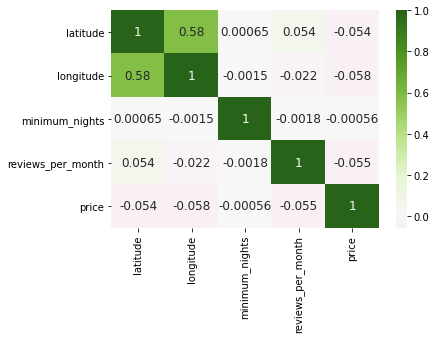

In [32]:
sns.heatmap(df[['latitude', 'longitude','minimum_nights', 'reviews_per_month', 'price']].corr(), cmap='PiYG', annot=True, annot_kws={"size":12}, center=0)

#### Lat long normalize



In [39]:
X_mean = X_train.mean()
X_std = X_train.std()
X_norm = (X_train[['latitude', 'longitude']] - X_mean[['latitude', 'longitude']])/X_std[['latitude', 'longitude']]

In [40]:
X_norm

,latitude,longitude
183806,-0.410674,-0.533122
22199,-1.399703,0.876137
114665,-0.826770,0.502161
179735,0.251661,-0.706578
57719,-2.137080,-2.035593
...,...,...
119879,0.741330,1.114447
103694,-0.230894,-0.571541
131932,0.736557,1.119856
146867,0.740784,1.116428


In [41]:
X_to_train = pd.concat([X_roomtype, X_norm], axis=1)
X_to_train

,Entire home/apt,Hotel room,Private room,Shared room,latitude,longitude
183806,0,0,1,0,-0.410674,-0.533122
22199,1,0,0,0,-1.399703,0.876137
114665,1,0,0,0,-0.826770,0.502161
179735,0,0,1,0,0.251661,-0.706578
57719,1,0,0,0,-2.137080,-2.035593
...,...,...,...,...,...,...
119879,1,0,0,0,0.741330,1.114447
103694,0,0,1,0,-0.230894,-0.571541
131932,1,0,0,0,0.736557,1.119856
146867,0,0,1,0,0.740784,1.116428


### **XGBoost**

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import StratifiedKFold

#Metrics
from sklearn.metrics import matthews_corrcoef

from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

**Validation (Baseline)**

In [ ]:
X_train_factorized.reset_index(drop=True, inplace=True)
Y_train.reset_index(drop=True, inplace=True)

rand_states = [28112020]
rand_scores_train = {}
rand_scores_val = {}

for r in rand_states:
    scores_train = []
    scores_val = []
    skf = StratifiedKFold(n_splits=2, random_state=r, shuffle=True)

    for train_index, test_index in skf.split(X_train_factorized, Y_train):
        model = XGBClassifier(random_state=1234)
        model.fit(X_train_factorized.loc[train_index], Y_train.loc[train_index])

        # Scoring pake matthew coefficient
        Y_predtrain = model.predict(X_train_factorized.loc[train_index])
        Y_pred = model.predict(X_train_factorized.loc[test_index])
        scores_train.append(matthews_corrcoef(Y_train.loc[train_index], Y_predtrain))
        scores_val.append(matthews_corrcoef(Y_train.loc[test_index], Y_pred))

    rand_scores_train[r] = scores_train
    rand_scores_val[r] = scores_val

    print(r, "Train", scores_train)
    print(r, "Test ", scores_val)
    print('----Baseline----')

print("Train: ", np.array(list(rand_scores_train.values())).mean())
print("Test : ",np.array(list(rand_scores_val.values())).mean())

28112020 Train [0.6655409433086, 0.6746301024506726]
28112020 Test  [0.6561619025893173, 0.670366583951997]
----Baseline----
Train:  0.6700855228796363
Test :  0.6632642432706571


**Validation (Mean Encoding)**

In [ ]:
X_train_encoded.reset_index(drop=True, inplace=True)
Y_train.reset_index(drop=True, inplace=True)

rand_states = [28112020]
rand_scores_train = {}
rand_scores_val = {}

for r in rand_states:
    scores_train = []
    scores_val = []
    skf = StratifiedKFold(n_splits=2, random_state=r, shuffle=True)

    for train_index, test_index in skf.split(X_train_encoded, Y_train):
        model = XGBClassifier(random_state=1234)
        model.fit(X_train_encoded.loc[train_index], Y_train.loc[train_index])

        # Scoring pake matthew coefficient
        Y_predtrain = model.predict(X_train_encoded.loc[train_index])
        Y_pred = model.predict(X_train_encoded.loc[test_index])
        scores_train.append(matthews_corrcoef(Y_train.loc[train_index], Y_predtrain))
        scores_val.append(matthews_corrcoef(Y_train.loc[test_index], Y_pred))

    rand_scores_train[r] = scores_train
    rand_scores_val[r] = scores_val

    print(r, "Train", scores_train)
    print(r, "Test ", scores_val)
    print('----Mean Encoding----')

print("Train: ", np.array(list(rand_scores_train.values())).mean())
print("Test : ",np.array(list(rand_scores_val.values())).mean())

28112020 Train [0.6841000106513192, 0.6835263309164379]
28112020 Test  [0.6732011110350239, 0.6782857262355316]
----Mean Encoding----
Train:  0.6838131707838786
Test :  0.6757434186352778


**Validation (Mean Encoding CV)**

In [ ]:
X_train_encoded_cv.reset_index(drop=True, inplace=True)
Y_train.reset_index(drop=True, inplace=True)

rand_states = [28112020]
rand_scores_train = {}
rand_scores_val = {}

for r in rand_states:
    scores_train = []
    scores_val = []
    skf = StratifiedKFold(n_splits=2, random_state=r, shuffle=True)

    for train_index, test_index in skf.split(X_train_encoded_cv, Y_train):
        model = XGBClassifier(random_state=1234)
        model.fit(X_train_encoded_cv.loc[train_index], Y_train.loc[train_index])

        # Scoring pake matthew coefficient
        Y_predtrain = model.predict(X_train_encoded_cv.loc[train_index])
        Y_pred = model.predict(X_train_encoded_cv.loc[test_index])
        scores_train.append(matthews_corrcoef(Y_train.loc[train_index], Y_predtrain))
        scores_val.append(matthews_corrcoef(Y_train.loc[test_index], Y_pred))

    rand_scores_train[r] = scores_train
    rand_scores_val[r] = scores_val

    print(r, "Train", scores_train)
    print(r, "Test ", scores_val)
    print('----Mean Encoding CV----')

print("Train: ", np.array(list(rand_scores_train.values())).mean())
print("Test : ",np.array(list(rand_scores_val.values())).mean())

28112020 Train [0.6777670857409718, 0.6817401099138475]
28112020 Test  [0.6714217109219112, 0.680522008888824]
----Mean Encoding CV----
Train:  0.6797535978274096
Test :  0.6759718599053676


**Submit**

In [ ]:
X_train_factorized.reset_index(drop=True, inplace=True)
Y_train.reset_index(drop=True, inplace=True)

model = XGBClassifier(random_state=1234)
model.fit(X_train_factorized, Y_train)

# Scoring pake matthew coefficient
Y_pred = model.predict(X_test_factorized)
Y_pred.to_csv('')

Baseline: 0.6645578040144313
Mean Encoding: 0.6747142800755542
Mean Encoding CV: 0.6768000304800589


In [ ]:
X_train_encoded.reset_index(drop=True, inplace=True)
Y_train.reset_index(drop=True, inplace=True)

model = XGBClassifier(random_state=1234)
model.fit(X_train_encoded, Y_train)

# Scoring pake matthew coefficient
Y_pred = model.predict(X_test_encoded)
Y_pred.to_csv('')

In [ ]:
X_train_encoded_cv.reset_index(drop=True, inplace=True)
Y_train.reset_index(drop=True, inplace=True)

model = XGBClassifier(random_state=1234)
model.fit(X_train_encoded_cv, Y_train)

# Scoring pake matthew coefficient
Y_pred = model.predict(X_test_encoded_cv)
Y_pred.to_csv('')

**Test**

In [ ]:
X_train_factorized.reset_index(drop=True, inplace=True)
Y_train.reset_index(drop=True, inplace=True)

model = XGBClassifier(random_state=1234)
model.fit(X_train_factorized, Y_train)

# Scoring pake matthew coefficient
Y_pred = model.predict(X_test_factorized)
print("Baseline:", matthews_corrcoef(Y_test, Y_pred))



X_train_encoded.reset_index(drop=True, inplace=True)
Y_train.reset_index(drop=True, inplace=True)

model = XGBClassifier(random_state=1234)
model.fit(X_train_encoded, Y_train)

# Scoring pake matthew coefficient
Y_pred = model.predict(X_test_encoded)
print("Mean Encoding:", matthews_corrcoef(Y_test, Y_pred))



X_train_encoded_cv.reset_index(drop=True, inplace=True)
Y_train.reset_index(drop=True, inplace=True)

model = XGBClassifier(random_state=1234)
model.fit(X_train_encoded_cv, Y_train)

# Scoring pake matthew coefficient
Y_pred = model.predict(X_test_encoded_cv)
print("Mean Encoding CV:", matthews_corrcoef(Y_test, Y_pred))

Baseline: 0.6645578040144313
Mean Encoding: 0.6747142800755542
Mean Encoding CV: 0.6768000304800589


### **NN**

In [17]:
import tensorflow as tf
from tensorflow import keras